Author: Geoff Boeing <br />
Web: http://geoffboeing.com/2015/03/chaos-theory-logistic-map/  <br />
Date: 2015-03-29 <br />
Description: This notebook demonstrates several ways to create Return Maps, or Poincaré Plots, to visualize system attractors and differentiate random noise from chaos. Return Maps embed 1-dimensional data (like time series) from a discrete dynamical system into 2- or 3-dimensional state space by plotting the value at time t vs the value at time t+1 (vs the value at time t+2, if it's a 3-D plot).

In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# for documentation of this function, see chaos-logistic-model.ipynb
def logistic_model(generations=20, growth_rate_min=0.5, growth_rate_max=4.0, growth_rate_steps=7, pop_initial=0.5):
    growth_rate_min = float(growth_rate_min)
    growth_rate_max = float(growth_rate_max) - 0.0000000001
    growth_rates = np.arange(growth_rate_min, growth_rate_max, (growth_rate_max - growth_rate_min) / growth_rate_steps)
    pops = pd.DataFrame(columns=growth_rates, index=range(generations))
    pops.iloc[0] = pop_initial
    for rate in pops.columns:
        pop = pops[rate]
        for t in range(generations - 1):
            pop[t + 1] = pop[t] * rate * (1 - pop[t])
    return pops

In [3]:
def get_poincare_points(pops, discard_gens):
    """
    convert a dataframe of values from the logistic model into a set of xy points that
    you can plot as a poincare diagram
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    """
    
    # drop the first row because every run has the same starting value, it leaves a visual artifact
    # drop the initial rows of the populations data, if specified by the argument
    if discard_gens > 0:
        discard_gens = np.arange(0, discard_gens)
        pops = pops.drop(labels=pops.index[discard_gens])
    li = []
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        
        # for each row in the column
        for label, row in pops.iterrows():
            
            # if this is not the last row in the column
            if label < len(pops)-1:
                
                # append the value at the current time (aka row) as the x and the value at t+1 as the y
                li.append((row[rate], pops[rate][label + 1]))
    
    # convert the xy list of values to a dataframe and return
    return pd.DataFrame(li, columns=['x', 'y'])

In [4]:
def get_poincare_points_3d(pops, discard_gens):
    """
    convert a dataframe of values from the logistic model into a set of xyz points that
    you can plot as a 3-D return map
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    """
    
    # drop the first row because every run has the same starting value, it leaves a visual artifact
    # drop the initial rows of the populations data, if specified by the argument
    if discard_gens > 0:
        discard_gens = np.arange(0, discard_gens)
        pops = pops.drop(labels=pops.index[discard_gens])
    li = []
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        
        # for each row in the column
        for label, row in pops.iterrows():
            
            # if this is not the 2nd to last row in the column
            if label < len(pops)-2:
                
                # append the value at the current time (aka row) as x, t+1 as y, and t+2 as z
                li.append((row[rate], pops[rate][label + 1], pops[rate][label + 2]))
    
    # convert the xy list of values to a dataframe and return
    return pd.DataFrame(li, columns=['x', 'y', 'z'])

In [5]:
def poincare_plot(pops, xmin=0, xmax=1, ymin=0, ymax=1, discard_gens=1, title=u'Poincaré Plot', marker='', size=3, c='r'):
    """
    plot the results of the logistic model as a poincaré plot
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    xmin = minimum value on the x axis
    xmax = maximum value on the x axis
    ymin = minimum value on the y axis
    ymax = maximum value on the y axis
    title = title of the plot
    marker = how to depict the data points in the plot
    size = size of the markers in the plot
    c = color of the markers
    """
    
    # first get the xy points to plot
    points = get_poincare_points(pops, discard_gens)
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    # plot the xy data
    poincare_scatter = ax.scatter(points['x'], points['y'], c=c, edgecolor='', alpha=1, s=size)

    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel('t + 1')

    plt.show()

In [6]:
def poincare_plot_3d(pops, xmin=0, xmax=1, ymin=0, ymax=1, zmin=0, zmax=1,
                     discard_gens=1, title=u'Poincaré Plot', marker='', size=5, alpha=0.1, c='r'):
    """
    plot the results of the logistic model as a poincaré plot
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    xmin = minimum value on the x axis
    xmax = maximum value on the x axis
    ymin = minimum value on the y axis
    ymax = maximum value on the y axis
    title = title of the plot
    marker = how to depict the data points in the plot
    size = size of the markers in the plot
    c = color of the markers
    """
    
    # first get the xyz points to plot
    points = get_poincare_points_3d(pops, discard_gens)
    
    # create a new matplotlib figure and axis and set its size
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca(projection='3d')

    # plot the xy data
    poincare_scatter = ax.scatter(points['x'], points['y'], points['z'], marker='.', c=c, edgecolor=c, s=size, alpha=alpha)

    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel('t + 1')
    ax.set_zlabel('t + 2')
    
    # configure the perspective from which to view the 3D plot
    ax.elev = 25.
    ax.azim = 240.
    ax.dist = 10.

    plt.show()

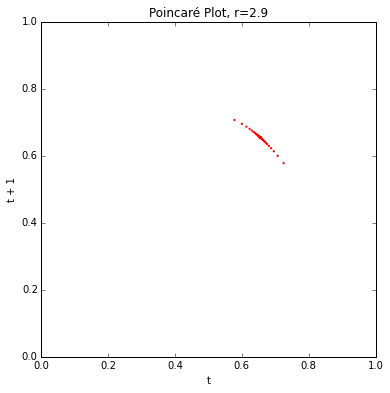

In [7]:
# draw a poincare plot for 100 generations for the growth rate parameter 2.9
# it shows points converging on 0.655 because the logistic map has a fixed-point attractor at 0.655 when r=2.9
generations = 100
growth_rate_min = 2.9
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, title=u'Poincaré Plot, r=2.9', size=5)

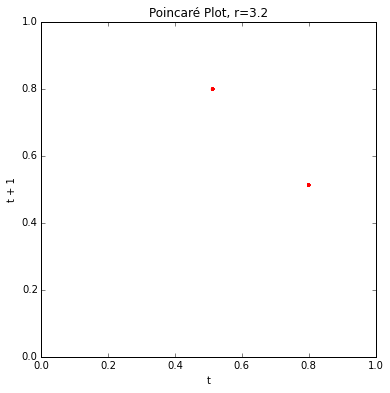

In [8]:
# draw a poincare plot for 100 generations for the growth rate parameter 3.2
# it shows 2 points because the logistic map has a period of 2 when r=3.2
generations = 100
growth_rate_min = 3.2
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, title=u'Poincaré Plot, r=3.2', size=10)

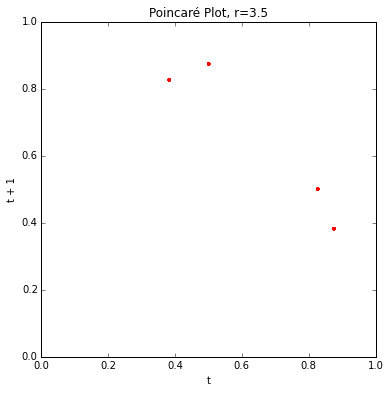

In [9]:
# draw a poincare plot for 100 generations for the growth rate parameter 3.5
# it shows 4 points because the logistic map has a period of 4 when r=3.5
generations = 100
growth_rate_min = 3.5
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, title=u'Poincaré Plot, r=3.5', size=10)

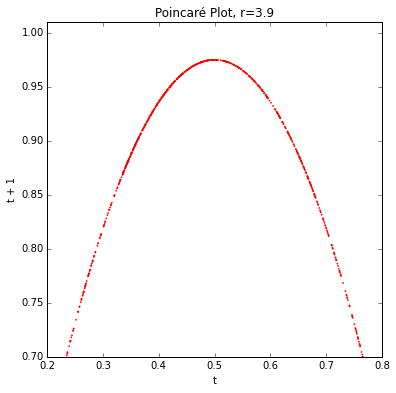

In [10]:
# draw a poincare plot for 2,000 generations for the growth rate parameter 3.9
# the plot reveals the strange attractor - the logistic map is chaotic when r=3.9
generations = 2000
growth_rate_min = 3.9
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, xmin=0.2, xmax=0.8, ymin=0.7, ymax=1.01, title=u'Poincaré Plot, r=3.9')

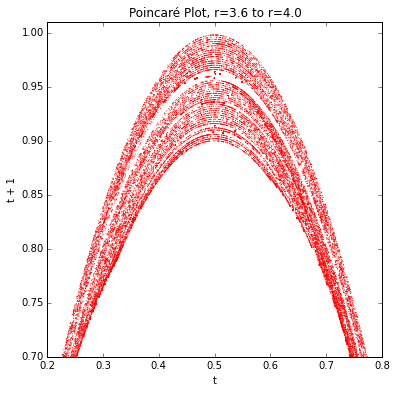

In [11]:
# draw a poincare plot for 1,000 generations across 50 growth rate steps from 3.6 to 4.0
# each chaotic growth rate has its own parabola
generations = 1000
growth_rate_min = 3.6
growth_rate_max = 4.0
growth_rate_steps = 50
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, xmin=0.2, xmax=0.8, ymin=0.7, ymax=1.01, size=1, title=u'Poincaré Plot, r=3.6 to r=4.0')

In [12]:
# sometimes it is hard to tell if a time series is chaotic or random
# generate two time series of 1000 steps, one chaotic and one random
gens = 30000
chaos_pops = logistic_model(gens, 3.999, 4.0, 1)
chaos_pops = chaos_pops.iloc[gens-1000:].reset_index().drop(labels='index', axis=1)
random_pops = pd.DataFrame([random.random() for _ in range(0, 1000)], columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['chaos', 'random']
time_series.iloc[900:905]

,chaos,random
900,0.627054,0.077883
901,0.9351953,0.879149
902,0.2423597,0.073870
903,0.7343024,0.735082
904,0.7802145,0.826099


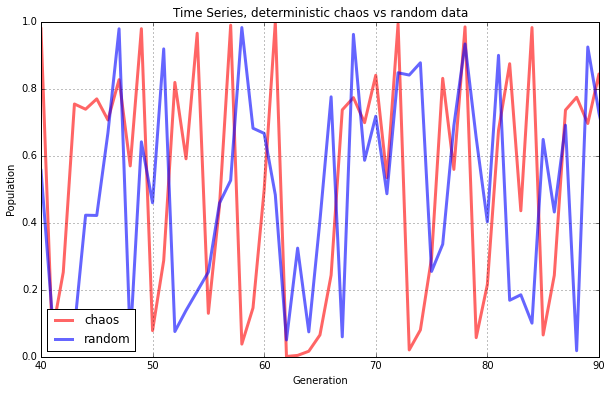

In [13]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
ax = time_series.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['r-', 'b-'])
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Time Series, deterministic chaos vs random data')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(loc=3, frameon=True, framealpha=1)
plt.show()

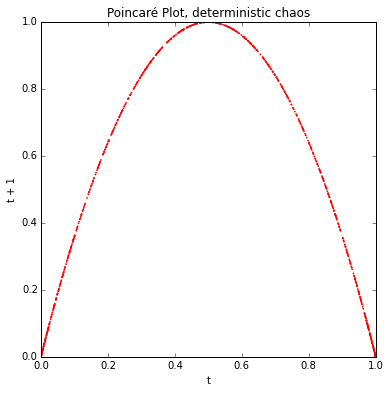

In [14]:
# draw a poincare plot the chaotic time series to show its strange attractor
poincare_plot(chaos_pops, title=u'Poincaré Plot, deterministic chaos')

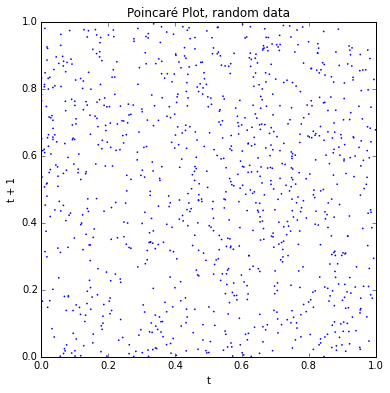

In [15]:
# now draw a poincare plot for the random time series to show it's just noise, no attractor
poincare_plot(random_pops, title=u'Poincaré Plot, random data', c='b')

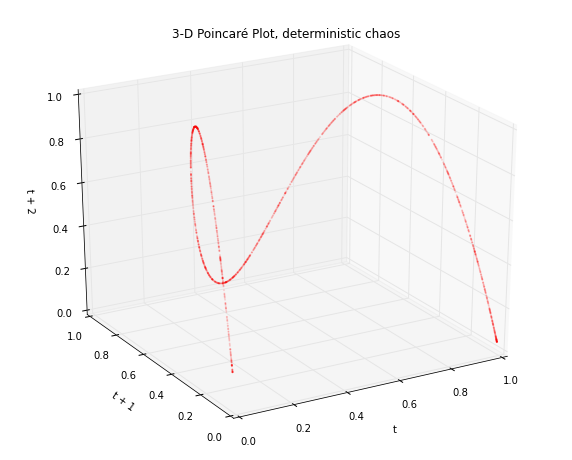

In [16]:
# the strange attractor is even more interesting when it's plotted in a 3-D Poincare plot
# embed the 1-D time series data in 3-D state space by plotting pop at time t vs t+1 vs t+2
pops = logistic_model(2000, 3.99, 4, 1)
poincare_plot_3d(pops, title=u'3-D Poincaré Plot, deterministic chaos')

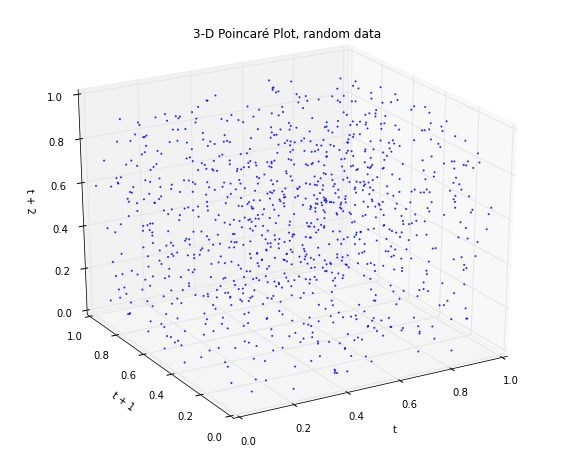

In [17]:
poincare_plot_3d(random_pops, title=u'3-D Poincaré Plot, random data', c='b', alpha=0.7)